state and cause
discovery date, day of yr, time

statues code for type of fire

cont_date


[time length, code of fire]


make an analysis
u will get a plots

tran and test and pedict

which state gets the code of fire using the duration and area burnt




In [1]:
import pandas as pd

In [2]:
from sqlite3 import connect

In [3]:
conn = connect("FPA_FOD_20170508.sqlite")

In [4]:
conn

In [5]:
data = pd.read_sql(sql = """SELECT name FROM sqlite_master  
  WHERE type='table';""",con = conn )

In [6]:
data

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


In [7]:
for table in data['name']:
    try:
        in_data = pd.read_sql(sql = 'select * from '+table, con = conn)
        if table != 'SpatialIndex':
            print(table,in_data.shape)
    except:
        pass

spatial_ref_sys (4924, 6)
spatialite_history (16, 7)
sqlite_sequence (3, 2)
geometry_columns (1, 6)
spatial_ref_sys_aux (4873, 12)
views_geometry_columns (0, 6)
virts_geometry_columns (0, 5)
geometry_columns_statistics (1, 8)
views_geometry_columns_statistics (0, 8)
virts_geometry_columns_statistics (0, 8)
geometry_columns_field_infos (0, 14)
views_geometry_columns_field_infos (0, 14)
virts_geometry_columns_field_infos (0, 14)
geometry_columns_time (1, 5)
geometry_columns_auth (1, 4)
views_geometry_columns_auth (0, 3)
virts_geometry_columns_auth (0, 3)
sql_statements_log (0, 7)
Fires (1880465, 39)
idx_Fires_Shape (1880465, 5)
idx_Fires_Shape_node (72263, 2)
idx_Fires_Shape_rowid (1880465, 2)
idx_Fires_Shape_parent (72262, 2)
NWCG_UnitIDActive_20170109 (5867, 13)


In [8]:
fires_data = pd.read_sql(sql = 'select * from Fires', con = conn)

In [9]:
fires_data.head().T

,0,1,2,3,4
OBJECTID,1,2,3,4,5
FOD_ID,1,2,3,4,5
FPA_ID,FS-1418826,FS-1418827,FS-1418835,FS-1418845,FS-1418847
SOURCE_SYSTEM_TYPE,FED,FED,FED,FED,FED
SOURCE_SYSTEM,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT
NWCG_REPORTING_AGENCY,FS,FS,FS,FS,FS
NWCG_REPORTING_UNIT_ID,USCAPNF,USCAENF,USCAENF,USCAENF,USCAENF
NWCG_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest
SOURCE_REPORTING_UNIT,0511,0503,0503,0503,0503
SOURCE_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest


In [10]:
fires_shape_data = pd.read_sql(sql = 'select * from idx_Fires_Shape', con = conn)
fires_shape_data.head()

,pkid,xmin,xmax,ymin,ymax
0,1064078,-166.869400,-166.869385,65.982597,65.982605
1,1064195,-166.269302,-166.269287,65.115898,65.115906
2,1729139,-166.166702,-166.166687,65.833298,65.833305
3,1064196,-166.152725,-166.152695,65.182594,65.182602
4,1064225,-166.029404,-166.029373,65.926895,65.926903


In [11]:
fires_shape_rid = pd.read_sql(sql = 'select * from idx_Fires_Shape_rowid', con = conn)
fires_shape_rid.tail()

,rowid,nodeno
1880460,1880461,43240
1880461,1880462,72082
1880462,1880463,72082
1880463,1880464,72082
1880464,1880465,68794


In [12]:
common_columns = set(fires_data.columns).intersection(fires_shape_data.columns)
common_columns

set()

In [13]:
correlation_matrix = fires_data.corr()
top_correlated_values = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10)
top_correlated_values

OBJECTID        OBJECTID          1.000000
CONT_DATE       DISCOVERY_DATE    0.999983
FIRE_YEAR       CONT_DATE         0.999495
DISCOVERY_DATE  FIRE_YEAR         0.999316
CONT_DOY        DISCOVERY_DOY     0.994455
FOD_ID          CONT_DATE         0.749375
                OBJECTID          0.736625
                FIRE_YEAR         0.683548
                DISCOVERY_DATE    0.682485
OBJECTID        CONT_DATE         0.621236
dtype: float64

In [14]:
top_states = fires_data['STATE'].value_counts().head(5).index
top_states_data = fires_data[fires_data['STATE'].isin(top_states)] #STAT_CAUSE_DESCR,FIRE_SIZE_CLASS, OWNER_DESCR
top_states_data

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


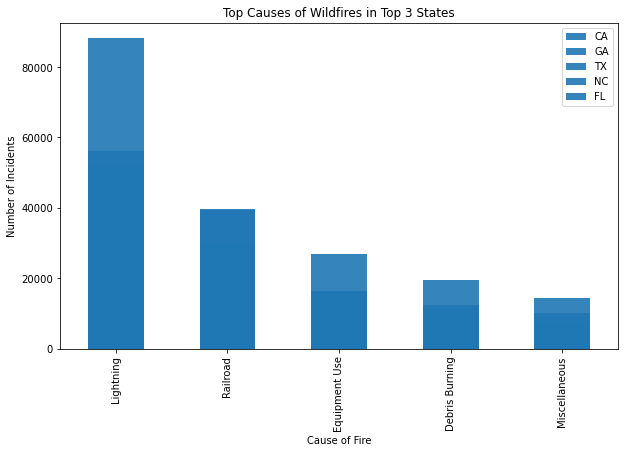

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for state in top_states:
    state_data = top_states_data[top_states_data['STATE'] == state]
    incidents_by_cause = state_data['STAT_CAUSE_DESCR'].value_counts().head(5)
    incidents_by_cause.plot(kind='bar', alpha=0.9,label=state)

plt.title('Top Causes of Wildfires in Top 3 States')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

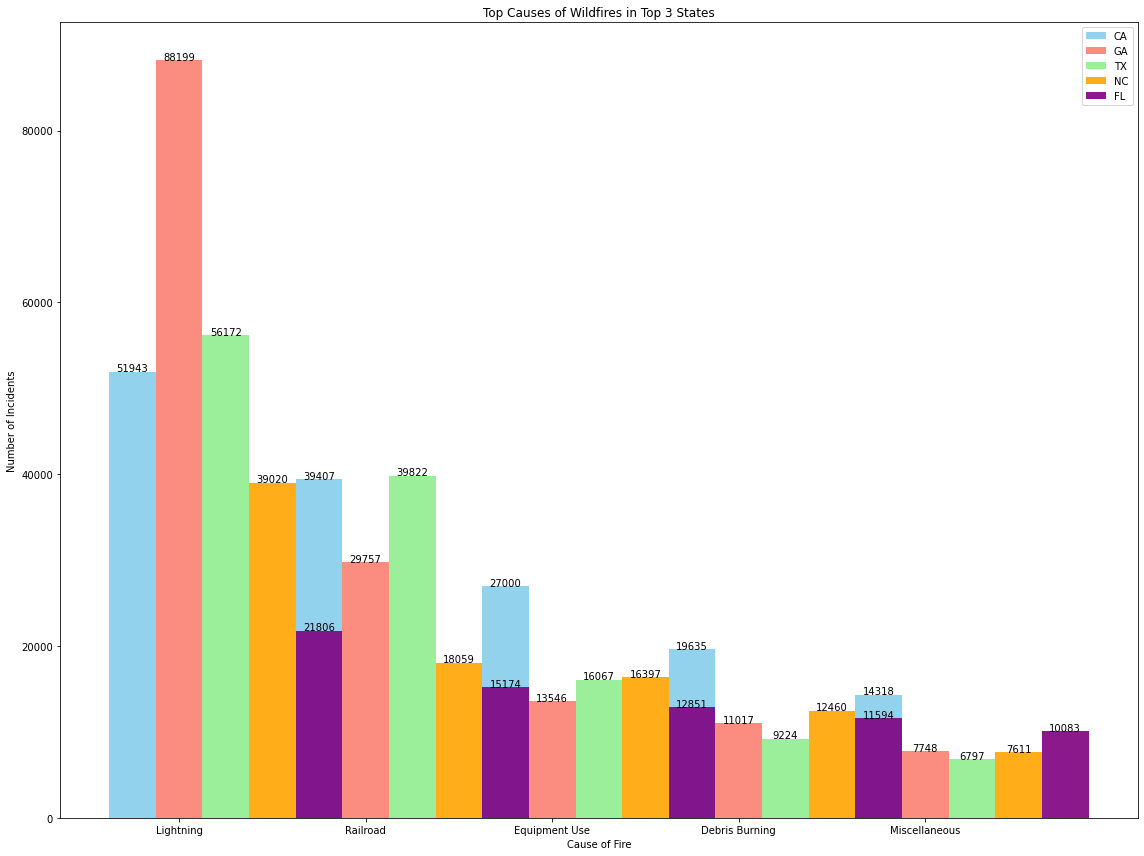

In [16]:
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(16, 12))
ax = plt.gca()

# Define colors for each state
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']

# Iterate over each state and plot side by side bars
for i, state in enumerate(top_states):
    state_data = top_states_data[top_states_data['STATE'] == state]
    incidents_by_cause = state_data['STAT_CAUSE_DESCR'].value_counts().head(5)
    x_offset = i * 0.25  # Offset to place bars side by side
    ax.bar(np.arange(len(incidents_by_cause)) + x_offset, incidents_by_cause.values, width=0.25, color=colors[i], alpha=0.9, label=state)
    
    # Display count on top of each bar
    for j, count in enumerate(incidents_by_cause.values):
        ax.text(j + x_offset, count + 15, str(count), ha='center', color='black')

# Set labels and title
plt.title('Top Causes of Wildfires in Top 3 States')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.xticks(np.arange(len(incidents_by_cause)) + 0.25, incidents_by_cause.index)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [17]:
# Assuming fires_data is your DataFrame containing the wildfires data
unique_values_per_column = {}
for column in fires_data.columns:
    unique_values_per_column[column] = fires_data[column].unique()

# Print unique values for each column
for column, values in unique_values_per_column.items():
    print(f"Unique values for column '{column}':")
    print(values)
    print()


Unique values for column 'OBJECTID':
[      1       2       3 ... 1880463 1880464 1880465]

Unique values for column 'FOD_ID':
[        1         2         3 ... 300348375 300348377 300348399]

Unique values for column 'FPA_ID':
['FS-1418826' 'FS-1418827' 'FS-1418835' ... '2015CAIRS28364460'
 '2015CAIRS29218079' '2015CAIRS26733926']

Unique values for column 'SOURCE_SYSTEM_TYPE':
['FED' 'NONFED' 'INTERAGCY']

Unique values for column 'SOURCE_SYSTEM':
['FS-FIRESTAT' 'DOI-WFMI' 'FWS-FMIS' 'FA-NFIRS' 'ST-NASF' 'ST-AZAZS'
 'ST-MOMOS' 'IA-AKACC' 'ST-MTMTS' 'ST-SCSCS' 'ST-COCOS' 'ST-MEMES'
 'ST-ORORS' 'ST-MSMSS' 'ST-NMNMS' 'ST-SDSDS' 'ST-UTUTS' 'ST-WAWAS'
 'ST-WYWYS' 'ST-OKOKS' 'ST-WIWIS' 'ST-MIMIS' 'ST-KYKYS' 'ST-ALALS'
 'ST-ARARS' 'ST-GAGAS' 'ST-LALAS' 'ST-TNTNS' 'ST-VAVAS' 'ST-FLFLS'
 'ST-NCNCS' 'IA-ICS209' 'ST-CACDF' 'ST-CTCTS' 'ST-NENES' 'ST-TXTXS'
 'IA-PRIITF' 'IA-HIWMO']

Unique values for column 'NWCG_REPORTING_AGENCY':
['FS' 'BIA' 'TRIBE' 'BLM' 'NPS' 'BOR' 'FWS' 'ST/C&L' 'DOD' 'IA' 

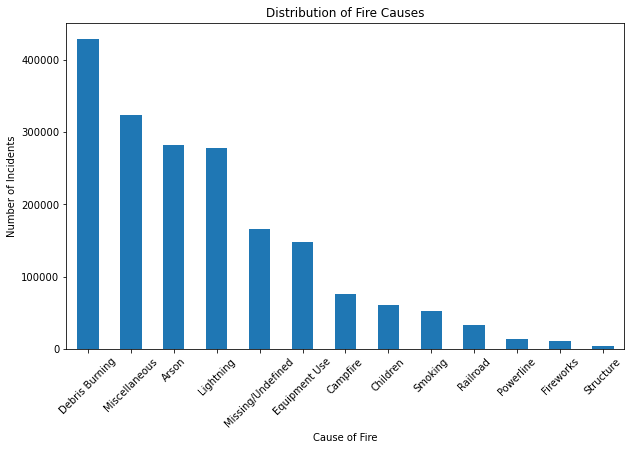

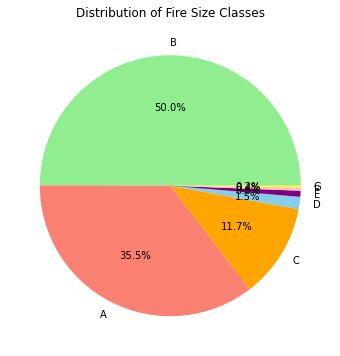

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# fires_data = pd.read_csv("path/to/dataset.csv")

# Basic EDA
# Plotting the distribution of fire causes
plt.figure(figsize=(10, 6))
fires_data['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar')
plt.title('Distribution of Fire Causes')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of fire size classes
plt.figure(figsize=(8, 6))
fires_data['FIRE_SIZE_CLASS'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon', 'orange', 'skyblue', 'purple', 'pink', 'yellow'])
plt.title('Distribution of Fire Size Classes')
plt.ylabel('')
plt.show()


In [19]:
df=fires_data

In [20]:
# Get a concise summary of the dataframe
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [21]:

# Generate descriptive statistics
print(df.describe())


           OBJECTID        FOD_ID     FIRE_YEAR  DISCOVERY_DATE  \
count  1.880465e+06  1.880465e+06  1.880465e+06    1.880465e+06   
mean   9.402330e+05  5.484020e+07  2.003710e+03    2.453064e+06   
std    5.428436e+05  1.011963e+08  6.663099e+00    2.434573e+03   
min    1.000000e+00  1.000000e+00  1.992000e+03    2.448622e+06   
25%    4.701170e+05  5.055000e+05  1.998000e+03    2.451084e+06   
50%    9.402330e+05  1.067761e+06  2.004000e+03    2.453178e+06   
75%    1.410349e+06  1.910639e+07  2.009000e+03    2.455036e+06   
max    1.880465e+06  3.003484e+08  2.015000e+03    2.457388e+06   

       DISCOVERY_DOY  STAT_CAUSE_CODE     CONT_DATE       CONT_DOY  \
count   1.880465e+06     1.880465e+06  9.889340e+05  988934.000000   
mean    1.647191e+02     5.979037e+00  2.453238e+06     172.656766   
std     9.003891e+01     3.483860e+00  2.687548e+03      84.320348   
min     1.000000e+00     1.000000e+00  2.448622e+06       1.000000   
25%     8.900000e+01     3.000000e+00  2.45070

In [22]:

# Check for missing values
print(df.isnull().sum())


OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

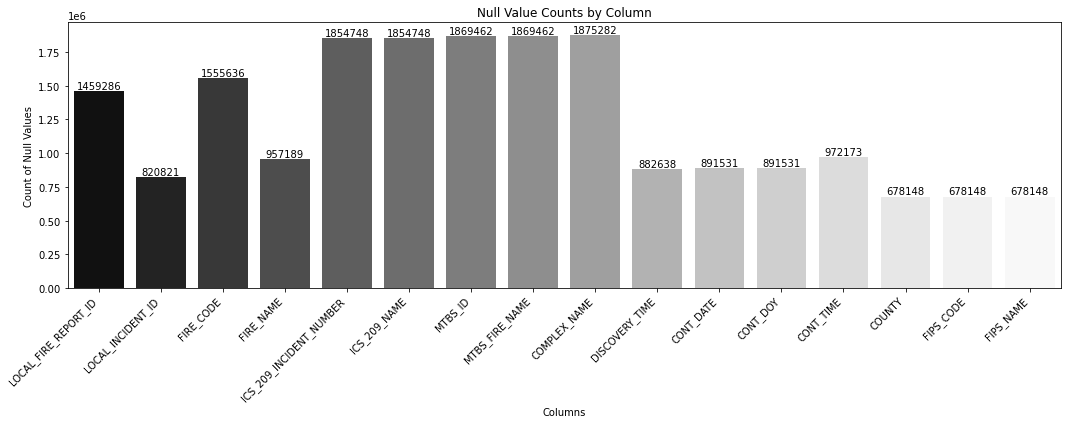

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame

# Calculate the sum of null values for each column
null_counts = df.isnull().sum()

# Filter out columns with zero null values
null_counts_filtered = null_counts[null_counts != 0]


# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=null_counts_filtered.index, y=null_counts_filtered.values, palette='Greys_r')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Null Value Counts by Column')

# Adding text annotations
for i, value in enumerate(null_counts_filtered.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


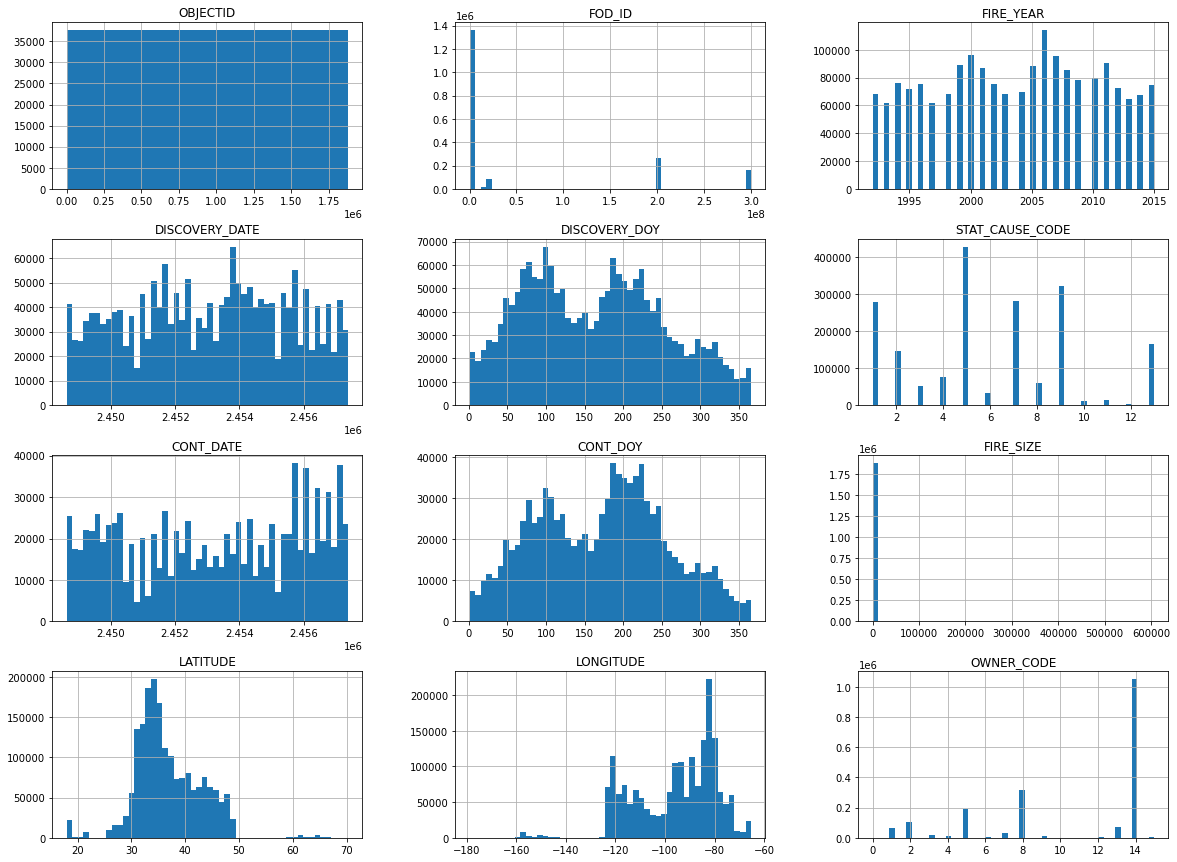

In [24]:

# Visualize the distribution of numerical features
df.hist(bins=50, figsize=(20,15))
plt.show()


In [25]:

# # Explore the categorical variables
# categorical_vars = df.select_dtypes(include=['object']).columns
# for var in categorical_vars:
#     print(f"Unique values for {var}:")
#     print(df[var].value_counts())
#     sns.countplot(x=var, data=df)
#     plt.show()


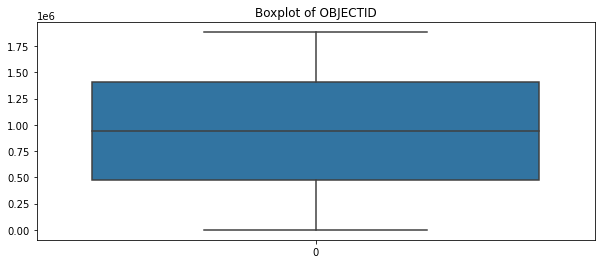

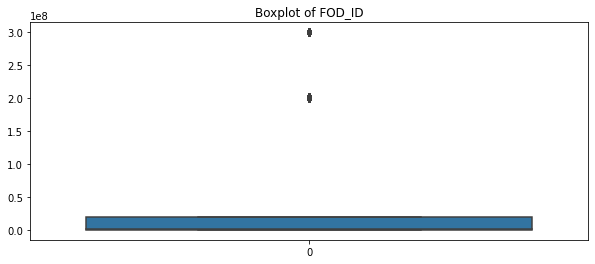

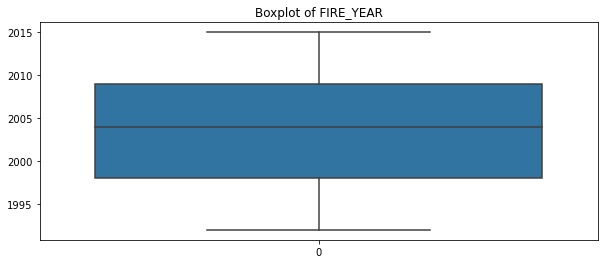

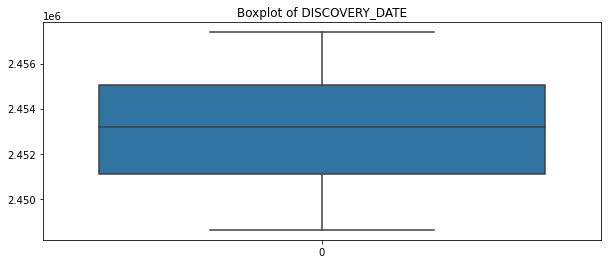

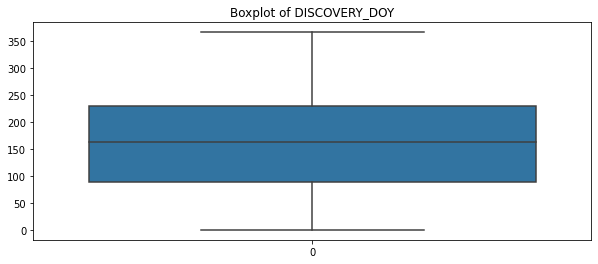

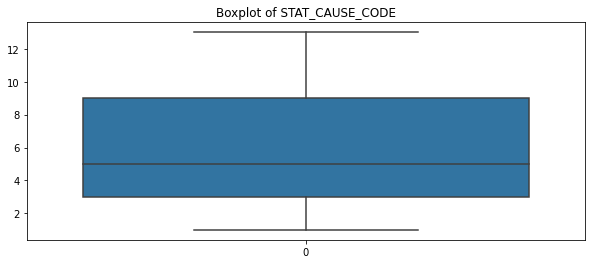

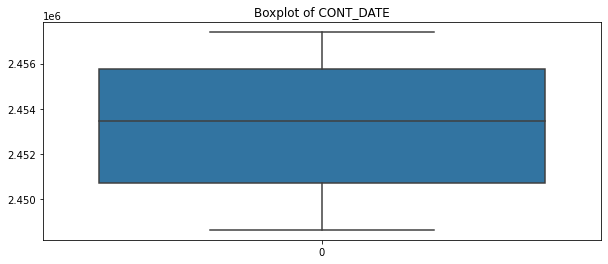

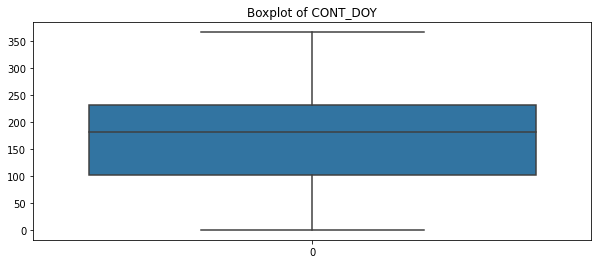

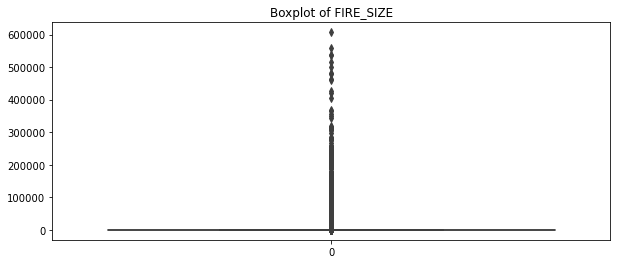

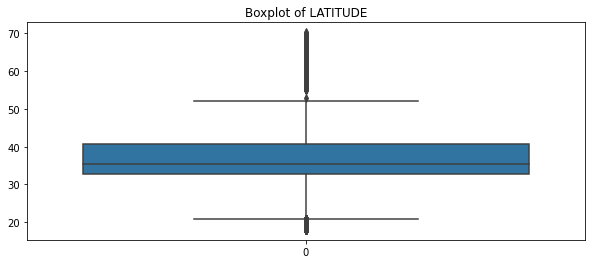

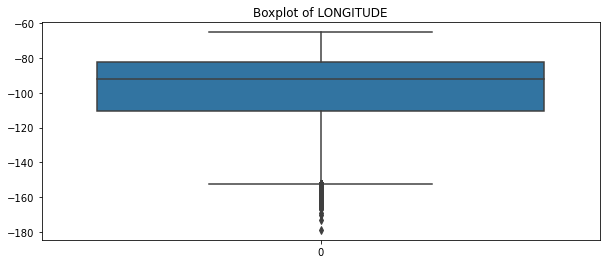

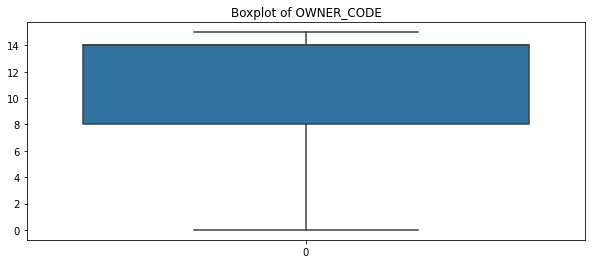

In [26]:

# Check for outliers using boxplots
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

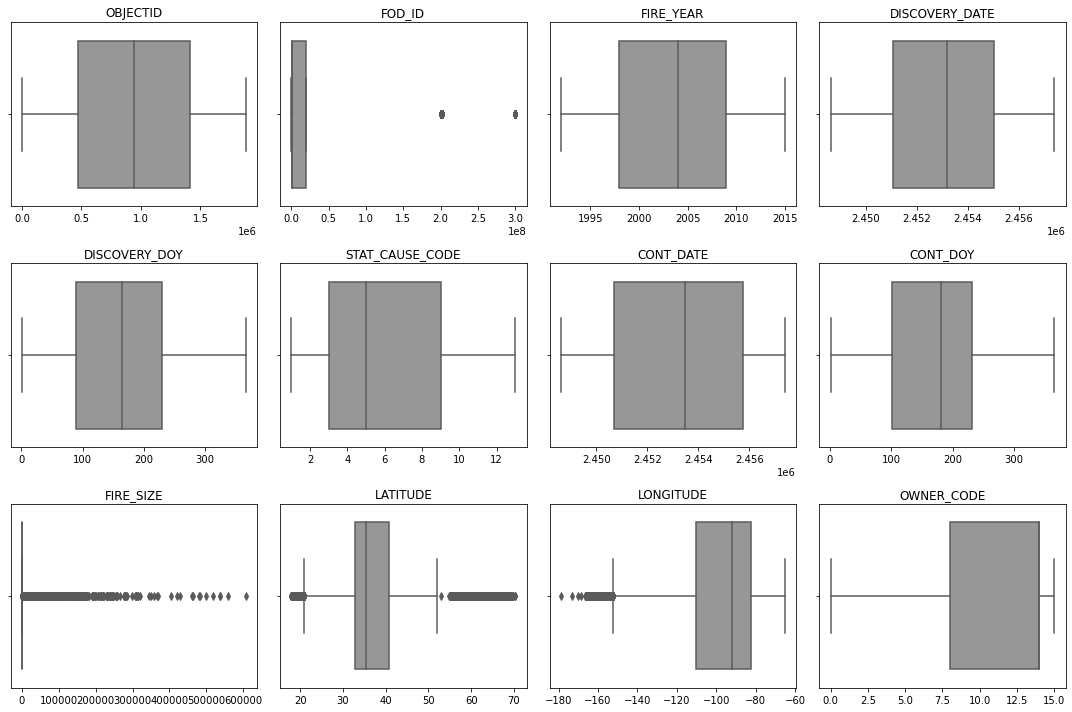

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with numerical columns

# Get the numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 4

# Calculate the total number of subplots needed
total_subplots = num_rows * num_cols

# Calculate the number of plots that will be blank (if the number of columns is less than the total_subplots)
blank_plots = total_subplots - len(numerical_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate through each column and create box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], palette='Greys_r')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove blank subplots
for j in range(len(numerical_cols), total_subplots):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


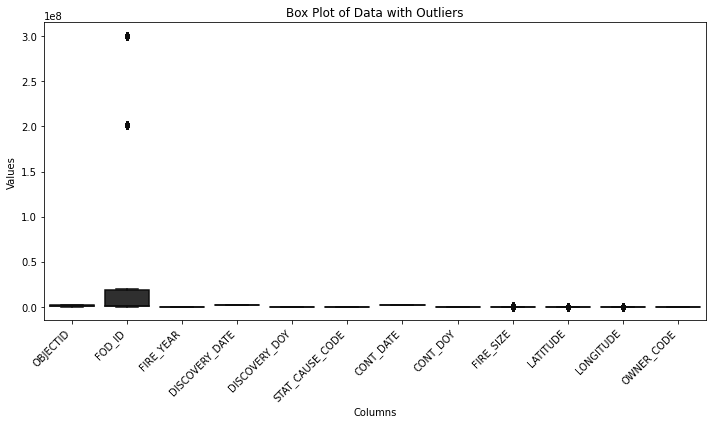

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numerical columns

# Plotting box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette='Greys_r')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of Data with Outliers')

plt.tight_layout()
plt.show()


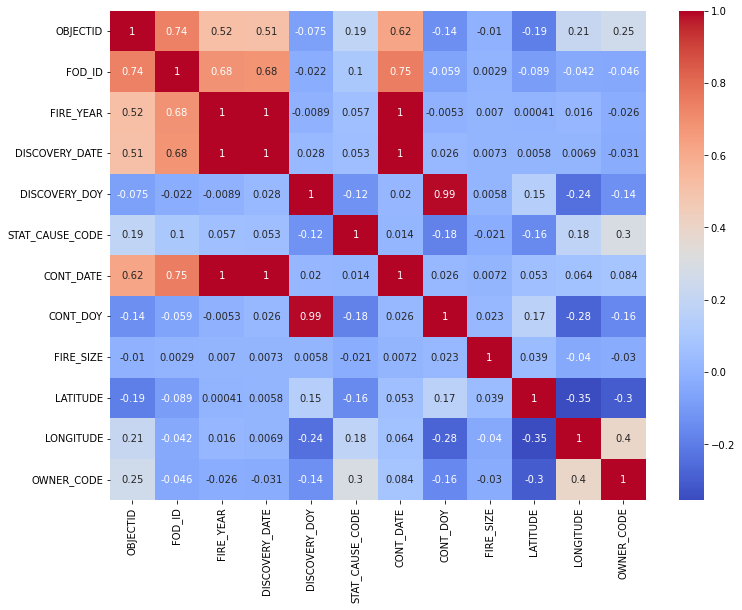

In [29]:

# Analyze the correlation between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [30]:

# Further analysis can include:
# - Time series analysis of wildfire occurrences
# - Geospatial analysis to visualize the locations of wildfires
# - Analysis of wildfire causes
# - Predictive modeling to forecast future wildfire occurrences

# Note: The above code assumes that the dataset has been preprocessed appropriately,
# and the column names correspond to the actual names in the dataset.

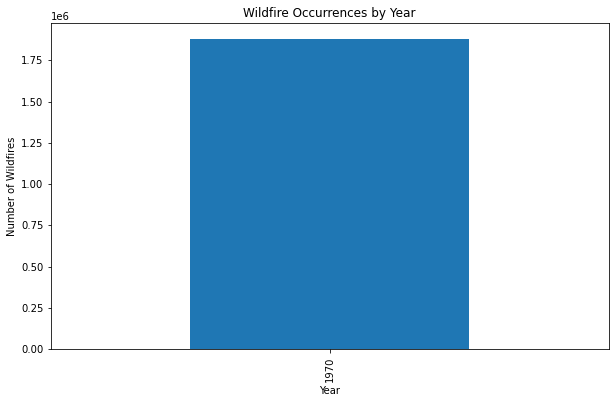

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'DISCOVERY_DATE' is converted to datetime format and 'FIRE_YEAR' exists
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'])

# Aggregate wildfire counts by year
yearly_counts = df.groupby(df['DISCOVERY_DATE'].dt.year).size()

# Plotting
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.title('Wildfire Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.show()

In [32]:
!pip install geopandas

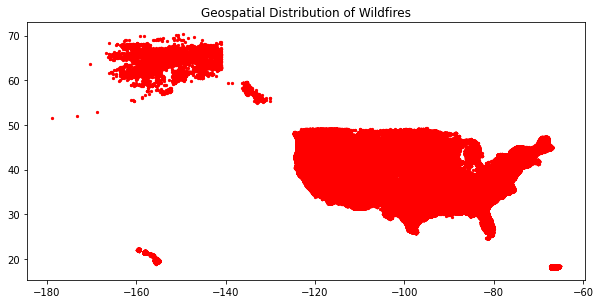

In [33]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming 'LATITUDE' and 'LONGITUDE' columns exist
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

# Plotting
gdf.plot(marker='o', color='red', markersize=5, figsize=(10, 6))
plt.title('Geospatial Distribution of Wildfires')
plt.show()

In [34]:
# import geopandas as gpd
# from shapely.geometry import Point
# import matplotlib.pyplot as plt

# # Assuming 'LATITUDE' and 'LONGITUDE' columns exist
# gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

# # Load US boundary shapefile
# us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot US map
# us_map.plot(ax=ax, color='lightgrey', edgecolor='black')

# # Plot wildfires
# gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# # Set title and show plot
# plt.title('Geospatial Distribution of Wildfires with US Map Outline')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()


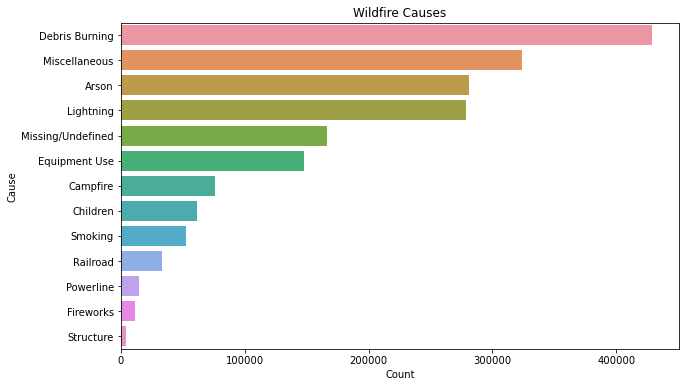

In [35]:
import seaborn as sns

# Assuming 'STAT_CAUSE_DESCR' exists
plt.figure(figsize=(10, 6))
sns.countplot(y='STAT_CAUSE_DESCR', data=df, order = df['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes')
plt.xlabel('Count')
plt.ylabel('Cause')
plt.show()

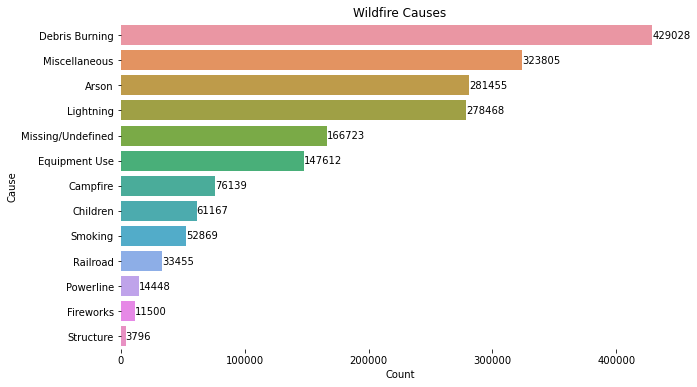

In [36]:
# Assuming 'STAT_CAUSE_DESCR' exists
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='STAT_CAUSE_DESCR', data=df, order=df['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes')
plt.xlabel('Count')
plt.ylabel('Cause')

sns.despine(left=True, bottom=True, right=True, top=True)

# Add count values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + p.get_height() / 2), ha='left', va='center')


# Hide the count axis
ax.tick_params(axis='x', labelleft=False)

plt.show()


In [37]:
unique_counts = df['OWNER_DESCR'].value_counts()
print(unique_counts)


MISSING/NOT SPECIFIED    1050835
PRIVATE                   314822
USFS                      188338
BIA                       106819
STATE OR PRIVATE           71881
BLM                        63278
STATE                      30790
NPS                        17524
FWS                        12191
TRIBAL                      8952
OTHER FEDERAL               6452
MUNICIPAL/LOCAL             4236
UNDEFINED FEDERAL           2206
COUNTY                      1841
BOR                          285
FOREIGN                       15
Name: OWNER_DESCR, dtype: int64


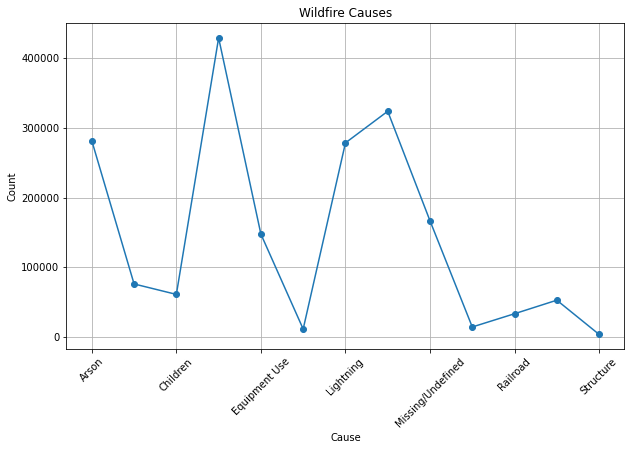

In [38]:
plt.figure(figsize=(10, 6))
cause_counts = df['STAT_CAUSE_DESCR'].value_counts().sort_index()
cause_counts.plot(kind='line', marker='o')
plt.title('Wildfire Causes')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\surya\AppData\Local\Temp\ipykernel_15372\1372135536.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


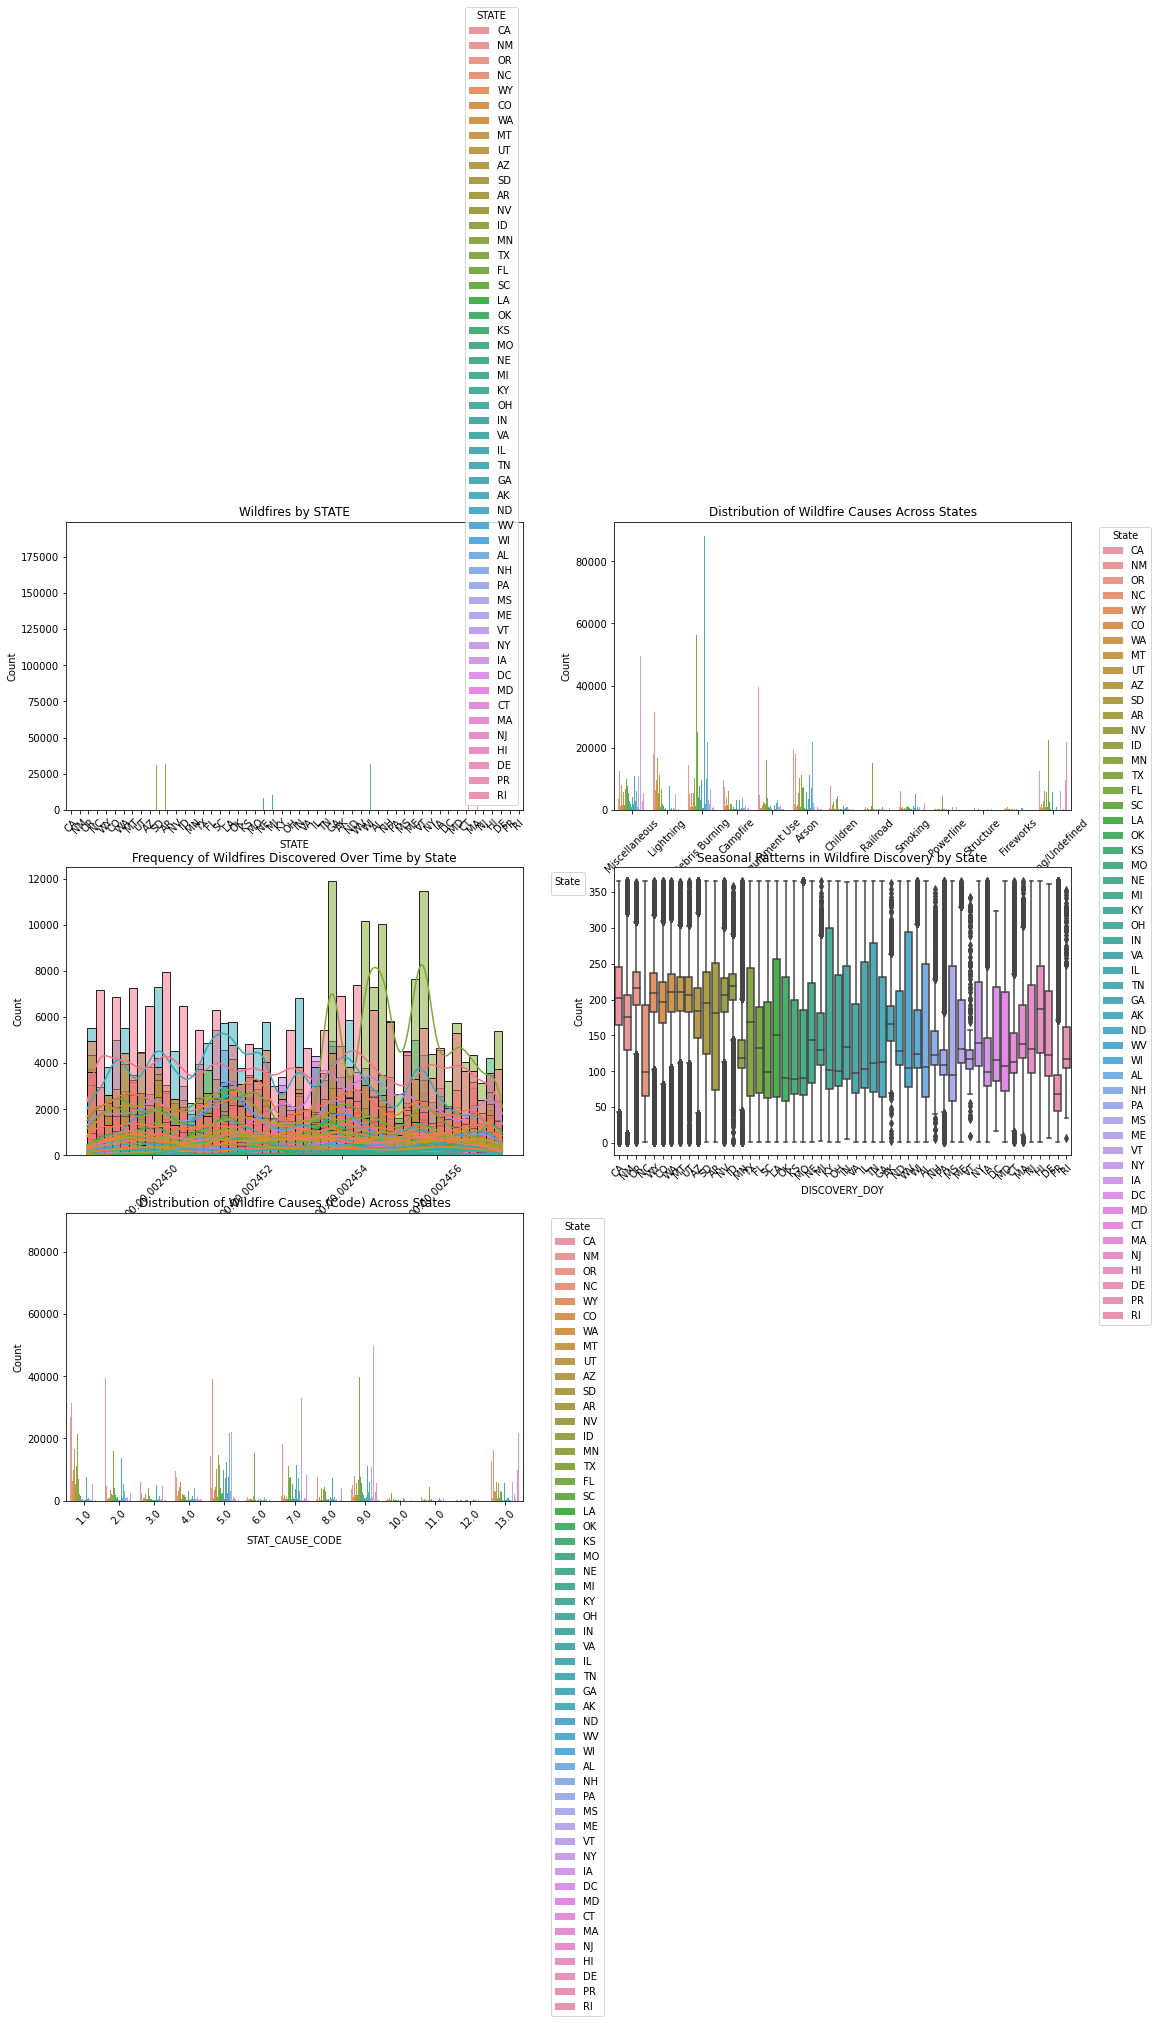

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns for bivariate analysis
columns = ['STATE', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'CONT_DATE']

# Set up the grid layout
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each pair of columns for bivariate analysis
for i, col in enumerate(columns):
    if i == 5:
        break  # Stop if we reach the last column
    
    # Plot bivariate analysis
    if col == 'DISCOVERY_DATE':
        sns.histplot(x=col, hue='STATE', data=df, bins=50, kde=True, ax=axes[i])
        axes[i].set_title(f'Frequency of Wildfires Discovered Over Time by State')
    elif col == 'DISCOVERY_DOY':
        sns.boxplot(x='STATE', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Seasonal Patterns in Wildfire Discovery by State')
    elif col == 'CONT_DATE':
        sns.boxplot(x='STATE', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Duration of Wildfires (from Discovery to Containment) by State')
    else:
        sns.countplot(x=col, hue='STATE', data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of Wildfire Causes Across States' if col == 'STAT_CAUSE_DESCR' else 
                          f'Distribution of Wildfire Causes (Code) Across States' if col == 'STAT_CAUSE_CODE' else 
                          f'Wildfires by {col}')
    
    # Set axis labels
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add legend if applicable
    if col in ['STAT_CAUSE_DESCR', 'STAT_CAUSE_CODE', 'DISCOVERY_DATE']:
        axes[i].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove the last subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


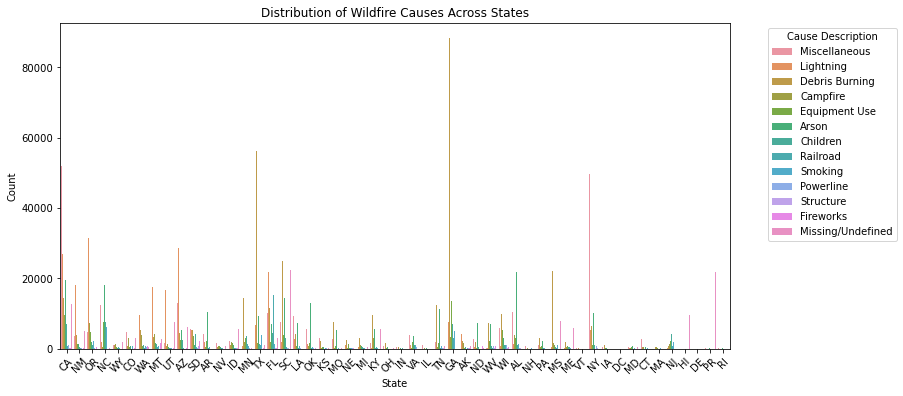

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='STATE', hue='STAT_CAUSE_DESCR', data=df)
plt.title('Distribution of Wildfire Causes Across States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cause Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


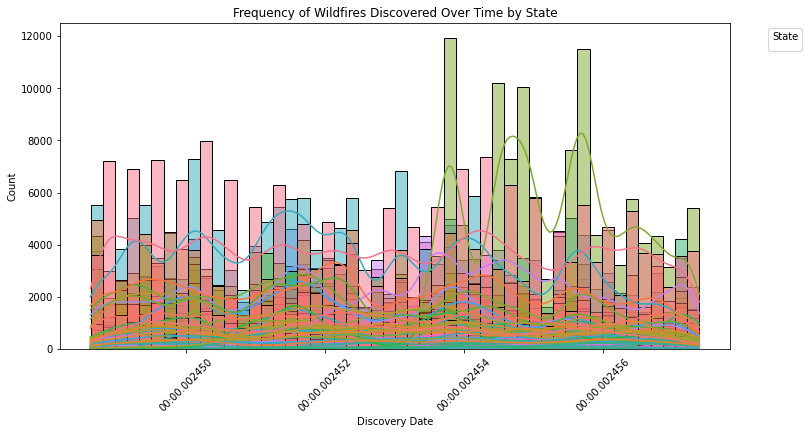

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(x='DISCOVERY_DATE', hue='STATE', data=df, bins=50, kde=True)
plt.title('Frequency of Wildfires Discovered Over Time by State')
plt.xlabel('Discovery Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


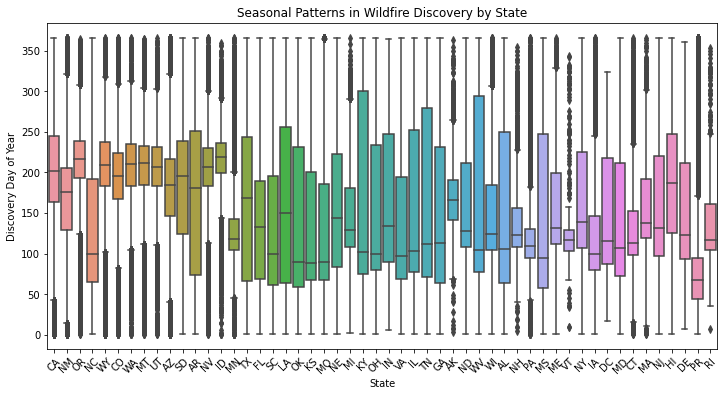

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE', y='DISCOVERY_DOY', data=df)
plt.title('Seasonal Patterns in Wildfire Discovery by State')
plt.xlabel('State')
plt.ylabel('Discovery Day of Year')
plt.xticks(rotation=45)
plt.show()


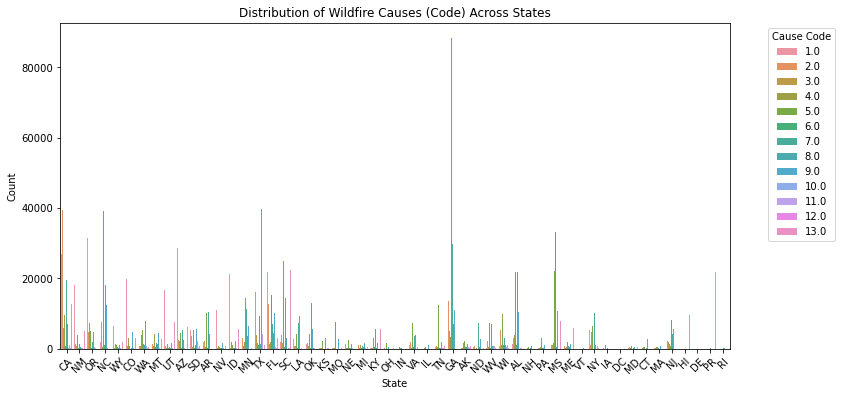

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='STATE', hue='STAT_CAUSE_CODE', data=df)
plt.title('Distribution of Wildfire Causes (Code) Across States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cause Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


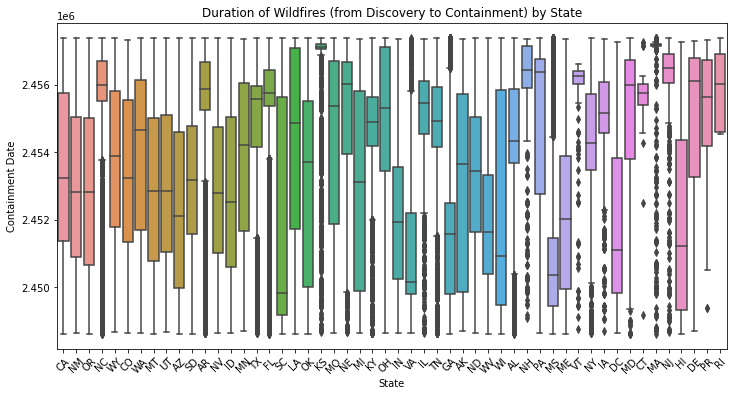

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE', y='CONT_DATE', data=df)
plt.title('Duration of Wildfires (from Discovery to Containment) by State')
plt.xlabel('State')
plt.ylabel('Containment Date')
plt.xticks(rotation=45)
plt.show()


In [53]:
# Identify top 3 causes, dates, and status cause codes for the top 5 states
top_causes = df[df['STATE'].isin(top_states)]['STAT_CAUSE_DESCR'].value_counts().nlargest(3).index.tolist()
print(top_causes)
# Filter data for top states
top_states_df = df[df['STATE'].isin(top_states)]
# print(top_states_df.head())
# Filter data for top 3 causes, dates, and status cause codes within top 3 states
top_causes_df = top_states_df[top_states_df['STAT_CAUSE_DESCR'].isin(top_causes)]
top_causes_df['STATE'].head()


['Debris Burning', 'Miscellaneous', 'Equipment Use']


0     CA
2     CA
7     CA
8     CA
12    CA
Name: STATE, dtype: object

In [54]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the relevant columns
# And 'STATE' and 'STAT_CAUSE_DESCR' are the columns representing state and cause respectively

# Group by 'STAT_CAUSE_DESCR' and 'STATE', count occurrences, and reset index
cause_state_counts = df.groupby(['STAT_CAUSE_DESCR', 'STATE']).size().reset_index(name='count')

# Sort by count in descending order within each cause group
cause_state_counts['rank'] = cause_state_counts.groupby('STAT_CAUSE_DESCR')['count'].rank(method='first', ascending=False)

# Filter for top 3 states for each cause
top_causes_df = cause_state_counts[cause_state_counts['rank'] <= 3]

# Drop the 'rank' column
top_causes_df = top_causes_df.drop(columns='rank')

# Display the DataFrame
print(top_causes_df)


      STAT_CAUSE_DESCR STATE  count
1                Arson    AL  21826
10               Arson    GA  29757
25               Arson    MS  33134
55            Campfire    AZ   6090
56            Campfire    CA   9516
89            Campfire    OR   7451
108           Children    CA   6930
114           Children    GA   7203
130           Children    NC   7608
164     Debris Burning    GA  88199
181     Debris Burning    NC  39020
198     Debris Burning    TX  56172
210      Equipment Use    CA  39407
216      Equipment Use    GA  13546
249      Equipment Use    TX  16067
280          Fireworks    MT   1618
294          Fireworks    SD   2304
300          Fireworks    WA    960
307          Lightning    AZ  28776
308          Lightning    CA  27000
341          Lightning    OR  31556
359      Miscellaneous    CA  51943
389      Miscellaneous    NY  49620
399      Miscellaneous    TX  39822
433  Missing/Undefined    NC  16397
444  Missing/Undefined    PR  21821
445  Missing/Undefined    SC

In [55]:
# Group by 'STAT_CAUSE_DESCR' and 'STATE', count occurrences, and reset index
cause_state_counts = df.groupby(['STAT_CAUSE_DESCR', 'STATE']).size().reset_index(name='count')

# Find the index of the maximum count for each cause
max_indices = cause_state_counts.groupby('STAT_CAUSE_DESCR')['count'].idxmax()

# Filter the DataFrame to include only the rows corresponding to the maximum count for each cause
top_causes_df = cause_state_counts.loc[max_indices]

# Display the DataFrame
print(top_causes_df)


      STAT_CAUSE_DESCR STATE  count
25               Arson    MS  33134
56            Campfire    CA   9516
130           Children    NC   7608
164     Debris Burning    GA  88199
210      Equipment Use    CA  39407
294          Fireworks    SD   2304
341          Lightning    OR  31556
359      Miscellaneous    CA  51943
445  Missing/Undefined    SC  22372
495          Powerline    TX   4351
511           Railroad    FL  15174
580            Smoking    NC   6164
640          Structure    SD    753


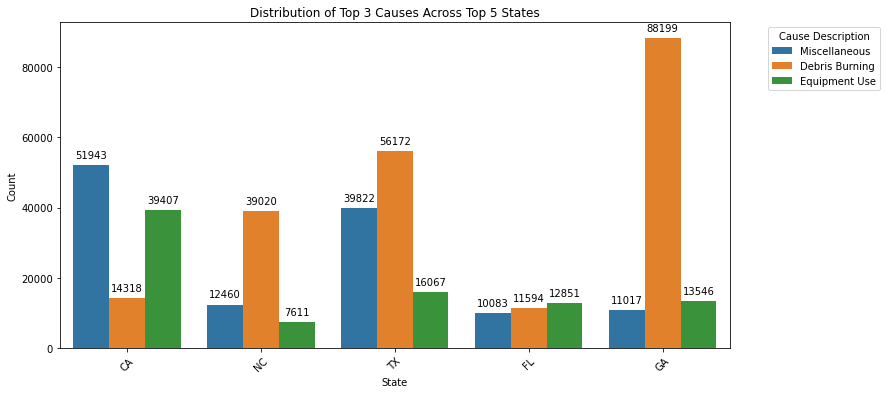

In [46]:
# STATE and STAT_CAUSE_DESCR for top 3 causes
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='STATE', hue='STAT_CAUSE_DESCR', data=top_causes_df)
plt.title('Distribution of Top 3 Causes Across Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cause Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [47]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Assuming 'df' is the DataFrame containing the relevant columns

# # 1. Prepare the data
# data = df[['STATE', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'CONT_DATE']]

# # Calculate time length of each fire
# data['DISCOVERY_DATE'] = pd.to_datetime(data['DISCOVERY_DATE'])
# data['CONT_DATE'] = pd.to_datetime(data['CONT_DATE'])
# data['time_length'] = (data['CONT_DATE'] - data['DISCOVERY_DATE']).dt.days

# # Encode the state column
# data['STATE'] = data['STATE'].astype('category').cat.codes

# # Drop rows with missing values
# data.dropna(inplace=True)

# # Select features and target variable
# X = data[['time_length', 'DISCOVERY_DOY']]
# y = data['STATE']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train and evaluate different models
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Random Forest": RandomForestClassifier(),
#     "Support Vector Machine": SVC()
# }

# for name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Evaluate the model
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{name} - Accuracy: {accuracy}")


In [48]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Example: Predicting wildfire cause based on 'FIRE_YEAR', 'LATITUDE', 'LONGITUDE'
# # This requires encoding the 'STAT_CAUSE_DESCR' and handling missing values

# # Preprocessing
# df.dropna(subset=['STAT_CAUSE_DESCR', 'FIRE_YEAR', 'LATITUDE', 'LONGITUDE'], inplace=True)
# X = df[['FIRE_YEAR', 'LATITUDE', 'LONGITUDE']]
# y = df['STAT_CAUSE_DESCR']

# # Encoding categorical data
# y = pd.factorize(y)[0]

# # Splitting the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test,y_pred))